# Objective 
A company want's to identify how much money (Premimum Amoun). Should to be paid by person who has taken inssuarance.

# Import the necessary libraries

In [53]:
# import the numpy and pandas package
import numpy as np
import pandas as pd

# Data Visualisation
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [54]:
#Supress warnings

import warnings
warnings.filterwarnings('ignore')


pd.set_option('display.max_columns',None)

# Imoport the data

In [55]:
data = pd.read_csv(r'C:\Users\LENOVO\Desktop\All data set\insurance.csv',header=0)

# make a copy of orignal data
data_1 = data

In [56]:
data.head(8)

,age,sex,bmi,children,smoker,region,charges,Month
0,19,female,27.900,0,yes,South,16884.92400,16.884924
1,18,male,33.770,1,no,South,1725.55230,1.725552
2,28,male,33.000,3,no,South,4449.46200,4.449462
3,33,male,22.705,0,no,North,21984.47061,21.984471
4,32,male,28.880,0,no,North,3866.85520,3.866855
5,31,female,25.740,0,no,South,3756.62160,3.756622
6,46,female,33.440,1,no,South,8240.58960,8.240590
7,37,female,27.740,3,no,North,7281.50560,7.281506


# EDA

In [57]:
print(data.shape)

(1338, 8)


In [58]:
print(data.dtypes)

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
Month       float64
dtype: object


In [59]:
print(data.describe())

               age          bmi     children       charges        Month
count  1338.000000  1338.000000  1338.000000   1338.000000  1338.000000
mean     39.207025    30.663397     1.094918  13270.422265    12.479378
std      14.049960     6.098187     1.205493  12110.011237    10.158076
min      18.000000    15.960000     0.000000   1121.873900     1.121874
25%      27.000000    26.296250     0.000000   4740.287150     4.740287
50%      39.000000    30.400000     1.000000   9382.033000     9.382033
75%      51.000000    34.693750     2.000000  16639.912515    16.639913
max      64.000000    53.130000     5.000000  63770.428010    34.489438


# Pre-Processing

# 1. Feature selection 

Region column donsent make any sense in these datasets its just <br>
for geogrphical location purpose so remove the region columns <br>
and take all the features.<br>

In [60]:
data=data.drop('region',axis=1)

# 2. Handling missing data 

In [61]:
data.head(8)

,age,sex,bmi,children,smoker,charges,Month
0,19,female,27.900,0,yes,16884.92400,16.884924
1,18,male,33.770,1,no,1725.55230,1.725552
2,28,male,33.000,3,no,4449.46200,4.449462
3,33,male,22.705,0,no,21984.47061,21.984471
4,32,male,28.880,0,no,3866.85520,3.866855
5,31,female,25.740,0,no,3756.62160,3.756622
6,46,female,33.440,1,no,8240.58960,8.240590
7,37,female,27.740,3,no,7281.50560,7.281506


In [62]:
total = data.isnull().sum().sort_values(ascending=False)
percent= (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total,percent],axis=1,keys=['Total','Percent'])
missing_data.head()

,Total,Percent
Month,0,0.0
charges,0,0.0
smoker,0,0.0
children,0,0.0
bmi,0,0.0


No missing value present in the data set

In [ ]:
X = data[['Index','Age','Gender','Total_Bilirubin','Direct_Bilirubin','Alkaline_Phosphotase',
'Alamine_Aminotransferase','Aspartate_Aminotransferase','Total_Protiens,Albumin',
'Albumin_and_Globulin_Ratio']]
y = data[['Class']]

# 3. Outlier Imputation

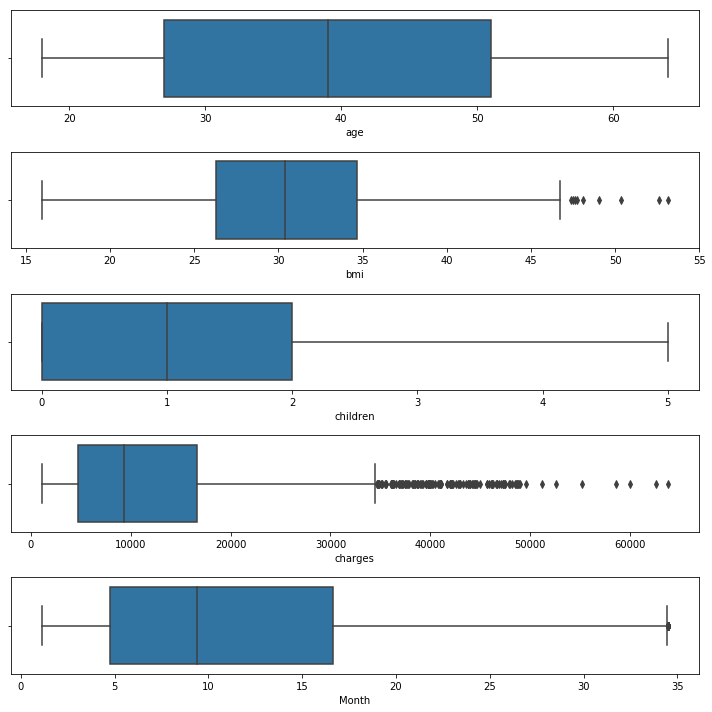

In [63]:
fig, axs = plt.subplots(5,figsize=(10,10))
plt1 = sns.boxplot(data['age'], ax = axs[0])
ptt2 = sns.boxplot(data['bmi'],ax=axs[1])
plt3 = sns.boxplot(data['children'],ax=axs[2])
plt4 = sns.boxplot(data['charges'],ax=axs[3])
plt5 = sns.boxplot(data['Month'],ax=axs[4])
plt.tight_layout()
plt.show()

 when ever we see a cluster of point then do not impute the outlier 
    if we are manipulatig so many points then we are making bais variable 

logically revelent value should not be imputed cluster of point should not be imputed money related varible should not be imputed
 try eleminating the extreme values rahter than bringing them to the medain level

so the charges value are logically accepted so no need to impute the outlier 


# Converting Categorical data Into Numeric

In [64]:
data = pd.get_dummies(data)

In [65]:
data.head()

,age,bmi,children,charges,Month,sex_female,sex_male,smoker_no,smoker_yes
0,19,27.900,0,16884.92400,16.884924,1,0,0,1
1,18,33.770,1,1725.55230,1.725552,0,1,1,0
2,28,33.000,3,4449.46200,4.449462,0,1,1,0
3,33,22.705,0,21984.47061,21.984471,0,1,1,0
4,32,28.880,0,3866.85520,3.866855,0,1,1,0


In [66]:
# Avoiding Dummy Variable Trap
data=data.drop('sex_female',axis=1)
data=data.drop('smoker_no',axis=1)

In [67]:
data.head()

,age,bmi,children,charges,Month,sex_male,smoker_yes
0,19,27.900,0,16884.92400,16.884924,0,1
1,18,33.770,1,1725.55230,1.725552,1,0
2,28,33.000,3,4449.46200,4.449462,1,0
3,33,22.705,0,21984.47061,21.984471,1,0
4,32,28.880,0,3866.85520,3.866855,1,0


# Seprate features and Labels

In [68]:
x = data[['age','bmi','children','Month','sex_male','smoker_yes']]
y = data[['charges']]

# Pre-Model Building Assumption

linear regression is parametric test so it makes some assumptions of the data so we have to check whether or not it follows all the assumptions of linear Regressioni.

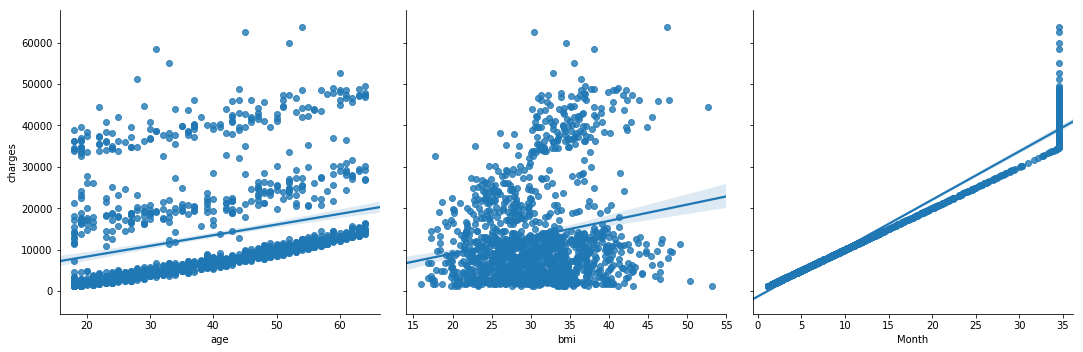

In [69]:
# 1. Every IV could have a linear relationship with the DV (pair-plot)

sns.pairplot(data, x_vars=['age','bmi',
                           'Month',],
                   y_vars='charges',
             kind='reg',height=5)

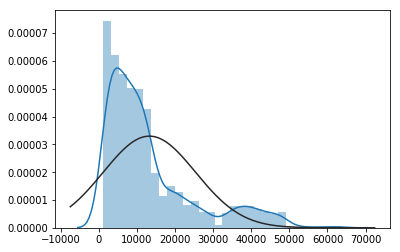

In [70]:
# 2. DV  should follow normal distribution

from scipy.stats import norm
sns.distplot(y,hist=True, fit=norm)

In [71]:
# Appling log transformation
y= np.log(y)

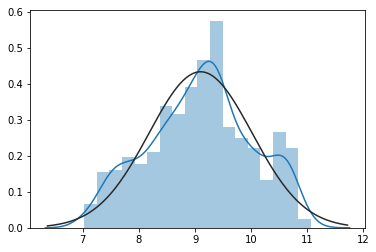

In [72]:
sns.distplot(y,hist=True, fit=norm)

After log transformation the Dv is now normally distributed.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001B068436EB8>,
      dtype=object)

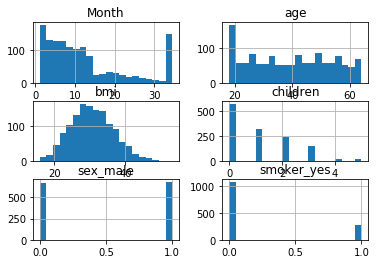

In [73]:
x.hist(bins=20)

children , month, smoker_yes are not following normal dist. 
so apply log transformation if the skewness is greater than 0.75
or less than -0.75

In [74]:
from scipy.stats import skew
data_num_skew = x.apply(lambda x: skew(x.dropna()))
data_num_skewed = data_num_skew[(data_num_skew > .75) | (data_num_skew < -.75)]

print(data_num_skew)
print()
print(data_num_skewed)
import numpy as np
# apply log + 1 transformation for all numeric features with skewnes over .75
x[data_num_skewed.index] = np.log1p(x[data_num_skewed.index]) 

age           0.055610
bmi           0.283729
children      0.937328
Month         1.082518
sex_male     -0.020928
smoker_yes    1.463124
dtype: float64

children      0.937328
Month         1.082518
smoker_yes    1.463124
dtype: float64


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001B0689276D8>,
      dtype=object)

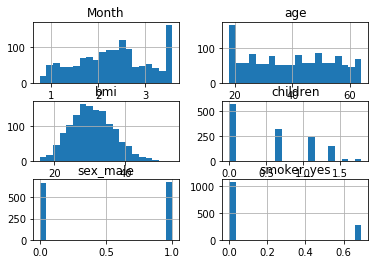

In [75]:
x.hist(bins=20)

In [76]:
# 3. No multicolinearity
corr_df=x.corr(method='pearson')
print(corr_df)

                 age       bmi  children     Month  sex_male  smoker_yes
age         1.000000  0.109272  0.048406  0.513331 -0.020856   -0.025019
bmi         0.109272  1.000000  0.016178  0.120945  0.046371    0.003750
children    0.048406  0.016178  1.000000  0.158127  0.016296    0.013245
Month       0.513331  0.120945  0.158127  1.000000  0.010044    0.672209
sex_male   -0.020856  0.046371  0.016296  0.010044  1.000000    0.076185
smoker_yes -0.025019  0.003750  0.013245  0.672209  0.076185    1.000000


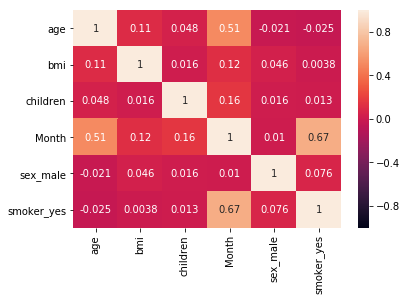

In [77]:
sns.heatmap(corr_df, vmin=-1.0,annot=True)

In [80]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

vif_df = pd.DataFrame()
vif_df["features"] =x.columns
vif_df["VIF Factor"] = [vif(x.values, i) for i in range(x.shape[1])]
vif_df.round(2)

,features,VIF Factor
0,age,18.38
1,bmi,12.03
2,children,2.21
3,Month,37.77
4,sex_male,2.00
5,smoker_yes,3.55


# Data Partition


In [81]:

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=10)



In [82]:
y_train.head()

,charges
428,8.060684
226,7.897109
867,9.356700
397,9.716344
300,8.816815


# Create the Linear Model

In [83]:
from sklearn.linear_model  import LinearRegression
regressor = LinearRegression()
model1= regressor.fit(x_train,y_train)

In [84]:
# print the intercept and coefficients

print(model1.intercept_)
print(model1.coef_)


[6.27258644]
[[ 0.00225642  0.00190044  0.03249455  1.1443126  -0.00958966  0.08373028]]


In [85]:
# pair the features name with the coefficents
a=list(zip(x.columns,model1.coef_))
a

[('age',
  array([ 0.00225642,  0.00190044,  0.03249455,  1.1443126 , -0.00958966,
          0.08373028]))]

In [86]:
coef=list(model1.coef_)
coef

[array([ 0.00225642,  0.00190044,  0.03249455,  1.1443126 , -0.00958966,
         0.08373028])]

# Accuracy for train test data

In [87]:
print('Train Score :', model1.score(x_train,y_train))
print('Train Score :', model1.score(x_test,y_test))


Train Score : 0.9959603078282446
Train Score : 0.9945147463950647


# Prediction

In [88]:
y_pred=model1.predict(x_test)
print(y_pred)

[[ 8.87294415]
 [ 8.50521439]
 [ 9.45441743]
 [10.16453863]
 [ 8.16722996]
 [ 8.87739379]
 [ 9.19072182]
 [ 9.76218013]
 [ 8.99398246]
 [ 9.97427081]
 [ 7.99941538]
 [ 8.07757248]
 [ 8.76551984]
 [ 9.05393977]
 [10.25963538]
 [ 9.47455239]
 [ 8.06566701]
 [ 9.71064263]
 [ 9.30110441]
 [10.00333165]
 [10.58673941]
 [ 7.68974768]
 [ 7.69357255]
 [ 8.74671972]
 [ 8.33892186]
 [ 9.45389408]
 [ 8.94929524]
 [ 9.45648165]
 [ 8.27088054]
 [10.02672462]
 [ 7.26715702]
 [10.59613946]
 [ 9.79963287]
 [ 8.99218968]
 [ 8.13880055]
 [ 8.67105175]
 [ 9.50827571]
 [ 9.10137787]
 [10.19422246]
 [ 8.92909441]
 [ 9.575049  ]
 [10.39973505]
 [ 8.50296321]
 [ 9.44440659]
 [ 7.25602446]
 [ 8.82582765]
 [ 9.01948339]
 [10.60141042]
 [ 9.40633465]
 [ 9.33369817]
 [10.57060932]
 [ 8.03311491]
 [ 8.89270433]
 [ 9.56814297]
 [10.26930459]
 [ 9.44379798]
 [ 9.29495804]
 [ 8.57003611]
 [ 8.70472741]
 [10.61889569]
 [ 7.49197402]
 [10.1671592 ]
 [10.41419399]
 [ 7.48530532]
 [ 9.7983759 ]
 [ 8.86488631]
 [ 9.79946

All the y_pred and y_test values are in log function. <br>
so take antilog of predicted values as well as y_test <br>

In [89]:
Predicted = np.exp(y_pred)

In [90]:
Predicted

array([[ 7136.26026642],
       [ 4940.46327425],
       [12764.42681424],
       [25965.87965724],
       [ 3523.57001009],
       [ 7168.08483841],
       [ 9805.72641581],
       [17364.44711898],
       [ 8054.46967238],
       [21466.97113526],
       [ 2979.21575888],
       [ 3221.40372923],
       [ 6409.39292459],
       [ 8552.16517935],
       [28556.37212676],
       [13024.04304659],
       [ 3183.2787912 ],
       [16492.19683086],
       [10950.1059875 ],
       [22099.97275348],
       [39606.13901714],
       [ 2185.82297364],
       [ 2194.19945753],
       [ 6290.02121436],
       [ 4183.57684766],
       [12757.74837996],
       [ 7702.46157335],
       [12790.80267848],
       [ 3908.38897587],
       [22623.05096293],
       [ 1432.47216919],
       [39980.19404098],
       [18027.1253501 ],
       [ 8040.0427508 ],
       [ 3424.80752753],
       [ 5831.62956606],
       [13470.74684529],
       [ 8967.64041639],
       [26748.20004616],
       [ 7548.42651228],


In [91]:
Actual = np.exp(y_test)

In [92]:
Actual.head()

,charges
7,7281.50560
999,5267.81815
1209,12347.17200
491,24513.09126
625,3736.46470


# Create the final data frame with predicted output

In [36]:
final_df =pd.DataFrame()
final_df= x_test

final_df['Actual ']=Actual
final_df['Predicted']=Predicted


In [37]:
final_df.head()

,age,bmi,children,Month,sex_male,smoker_yes,Actual,Predicted
7,37,27.740,3,7.281506,0,0,7281.50560,6738.594560
999,36,26.885,0,5.267818,0,0,5267.81815,4739.848878
1209,59,37.100,1,12.347172,1,0,12347.17200,11621.803952
491,61,25.080,0,24.513091,0,0,24513.09126,29966.340430
625,29,26.030,0,3.736465,0,0,3736.46470,3749.203898


# R2 SCORE , RMSE

In [38]:
# IN LOG SCALE

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error
r2=r2_score(y_test,y_pred)
print('R2 SCORE: ',r2)

rmse=np.sqrt(mean_squared_error(y_test,y_pred))
print('RMSE :', rmse)
print()
print()
print(min(data['charges']),'--------',rmse,'--------',max(data['charges']))

In [39]:
from sklearn.metrics import r2_score, mean_squared_error
r2=r2_score(y_test,y_pred)
print('R2 SCORE: ',r2)

rmse=np.sqrt(mean_squared_error(y_test,y_pred))
print('RMSE :', rmse)
print()
print()
print(min(data['charges']),'--------',rmse,'--------',max(data['charges']))

R2 SCORE:  0.9190853186205206
RMSE : 0.2517972451806441


7.02275569117477 -------- 0.2517972451806441 -------- 11.063044851063491


In [40]:
#IN ACTUAL SCALE

In [41]:
from sklearn.metrics import r2_score, mean_squared_error
r2=r2_score(Actual,Predicted)
print('R2 SCORE: ',r2)

rmse=np.sqrt(mean_squared_error(Actual,Predicted))
print('RMSE :', rmse)
print()
print()
print(min(data_1['charges']),'--------',rmse,'--------',max(data_1['charges']))

R2 SCORE:  0.8329545128693676
RMSE : 4657.485710693436


1121.8739 -------- 4657.485710693436 -------- 63770.42801


# Using statsmodel lib

In [42]:
# LOG SCALE

In [43]:
import statsmodels.formula.api as sm

# create a fitted model with all the features

model2 = sm.ols(formula='charges~age+bmi+children+Month+sex_male+smoker_yes',data=data).fit()

In [44]:
print(model2.params)
print(model1.intercept_ , model1.coef_)

Intercept     7.544632
age           0.017856
bmi          -0.004043
children      0.069497
Month         0.073444
sex_male     -0.062954
smoker_yes    0.083505
dtype: float64
[7.54338877] [[ 0.01838471 -0.00439862  0.06439795  0.0715247  -0.05178526  0.12606254]]


Both the intercept and coef for model1 and model2 are almost equal 

In [45]:
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.931
Method:                 Least Squares   F-statistic:                     2986.
Date:                Tue, 30 Apr 2019   Prob (F-statistic):               0.00
Time:                        14:33:26   Log-Likelihood:                 1.3818
No. Observations:                1338   AIC:                             11.24
Df Residuals:                    1331   BIC:                             47.63
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.5446      0.039    192.827      0.0

In [46]:
# ACTUAL SCALE 

In [47]:
data_1.head()

,age,sex,bmi,children,smoker,region,charges,Month
0,19,female,27.900,0,yes,South,16884.92400,16.884924
1,18,male,33.770,1,no,South,1725.55230,1.725552
2,28,male,33.000,3,no,South,4449.46200,4.449462
3,33,male,22.705,0,no,North,21984.47061,21.984471
4,32,male,28.880,0,no,North,3866.85520,3.866855


In [48]:


model3 = sm.ols(formula='charges~age+bmi+children+Month+sex+smoker',data=data_1).fit()

In [49]:
print(model2.params)

print()

print(model3.params)


Intercept     7.544632
age           0.017856
bmi          -0.004043
children      0.069497
Month         0.073444
sex_male     -0.062954
smoker_yes    0.083505
dtype: float64

Intercept       -4102.077030
sex[T.male]        51.331665
smoker[T.yes]    1925.547411
age                 6.020193
bmi                99.141537
children           -6.777859
Month            1096.498215
dtype: float64


In [50]:
print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.964
Model:                            OLS   Adj. R-squared:                  0.964
Method:                 Least Squares   F-statistic:                     6007.
Date:                Tue, 30 Apr 2019   Prob (F-statistic):               0.00
Time:                        14:33:26   Log-Likelihood:                -12247.
No. Observations:                1338   AIC:                         2.451e+04
Df Residuals:                    1331   BIC:                         2.454e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -4102.0770    369.786    -11.093

# Post-Model Building Assumption


In [51]:
# No Autocorrelation

DW TEST = 1.887. close to 2.0 means no Autocorrelation

In [52]:
# Error should be random (Fitted vs Residual plot)

Text(0, 0.5, 'Residuals')

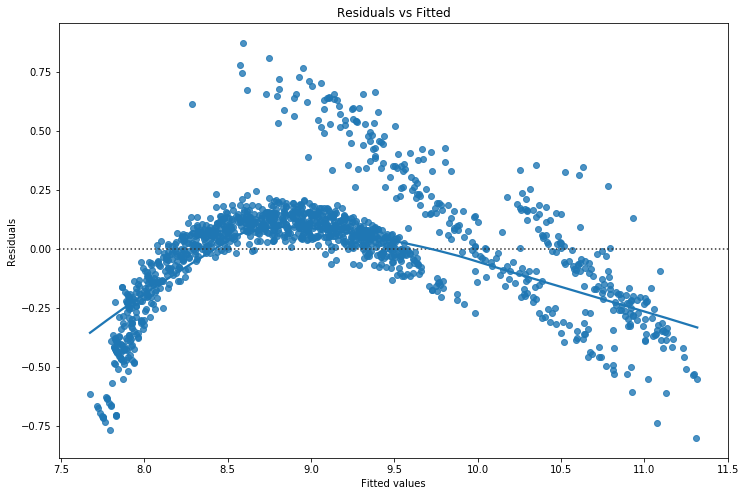

In [53]:


plot_lm_1 = plt.figure(1)
plot_lm_1.set_figheight(8)
plot_lm_1.set_figwidth(12)

model_fitted_y =model2.fittedvalues

plot_lm_1.axes[0]=sns.residplot(model_fitted_y, 'charges',data=data,lowess=True)

plot_lm_1.axes[0].set_title('Residuals vs Fitted')
plot_lm_1.axes[0].set_xlabel('Fitted values')
plot_lm_1.axes[0].set_ylabel('Residuals')

In [54]:
# normal sclae

Text(0, 0.5, 'Residuals')

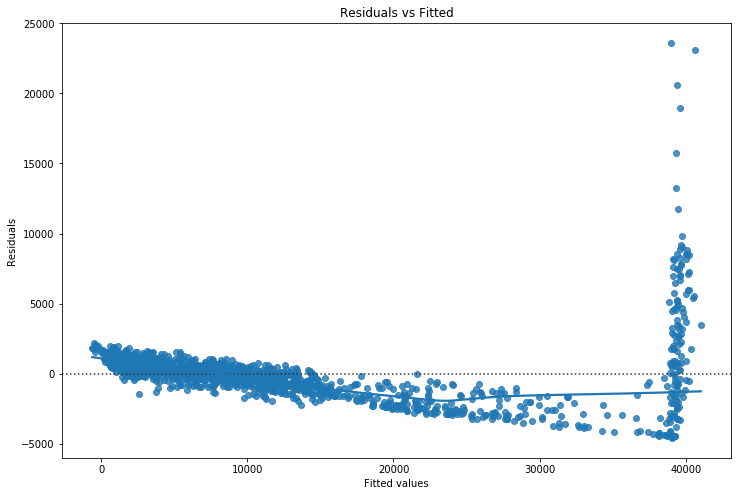

In [55]:
# Error should be random (Fitted vs Residual plot)

plot_lm_1 = plt.figure(1)
plot_lm_1.set_figheight(8)
plot_lm_1.set_figwidth(12)

model_fitted_y =model3.fittedvalues

plot_lm_1.axes[0]=sns.residplot(model_fitted_y, 'charges',data=data_1,lowess=True)

plot_lm_1.axes[0].set_title('Residuals vs Fitted')
plot_lm_1.axes[0].set_xlabel('Fitted values')
plot_lm_1.axes[0].set_ylabel('Residuals')

In [56]:
# Erro should follow normal dist (normal qq plot)

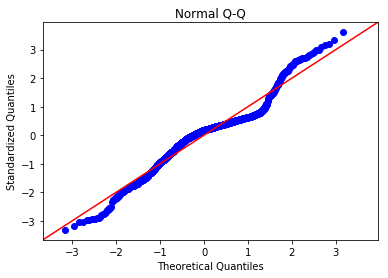

In [57]:
res = model2.resid
import statsmodels.api as stm
import scipy.stats as stats
fig = stm.qqplot(res, fit=True, line='45')
plt.title('Normal Q-Q')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Standardized Quantiles')
plt.show()

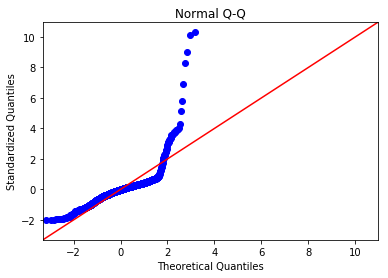

In [58]:
res = model3.resid
import statsmodels.api as stm
import scipy.stats as stats
fig = stm.qqplot(res, fit=True, line='45')
plt.title('Normal Q-Q')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Standardized Quantiles')
plt.show()

In [59]:
# Error should have a constant varience 

Text(0, 0.5, '$\\sqrt{|Standardized Residuals|}$')

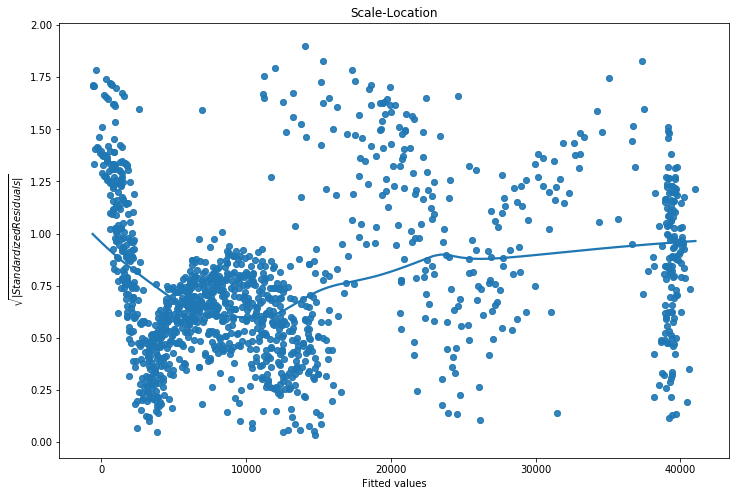

In [60]:
# normalized residuals
model_norm_residuals = model2.get_influence().resid_studentized_internal
# absolute squared normalized residuals
model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))

plot_lm_3 = plt.figure(3)
plot_lm_3.set_figheight(8)
plot_lm_3.set_figwidth(12)
plt.scatter(model_fitted_y, model_norm_residuals_abs_sqrt, alpha=0.5)
sns.regplot(model_fitted_y, model_norm_residuals_abs_sqrt, lowess=True)


plot_lm_3.axes[0].set_title('Scale-Location')
plot_lm_3.axes[0].set_xlabel('Fitted values')
plot_lm_3.axes[0].set_ylabel('$\sqrt{|Standardized Residuals|}$')



Text(0, 0.5, '$\\sqrt{|Standardized Residuals|}$')

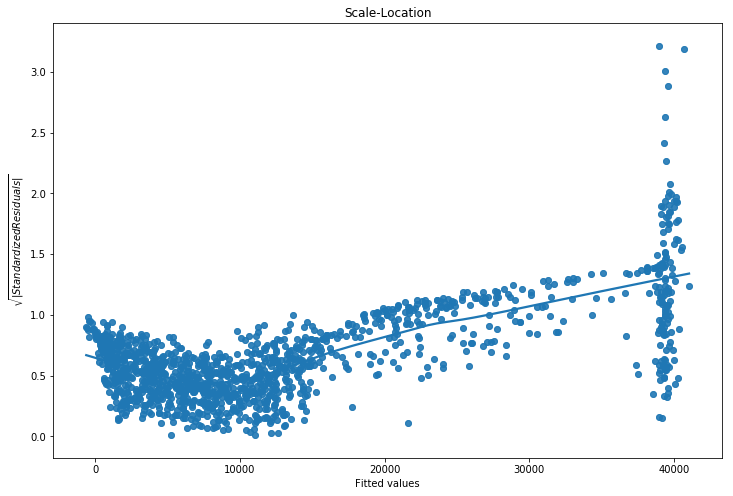

In [61]:
# normalized residuals
model_norm_residuals = model3.get_influence().resid_studentized_internal
# absolute squared normalized residuals
model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))

plot_lm_3 = plt.figure(3)
plot_lm_3.set_figheight(8)
plot_lm_3.set_figwidth(12)
plt.scatter(model_fitted_y, model_norm_residuals_abs_sqrt, alpha=0.5)
sns.regplot(model_fitted_y, model_norm_residuals_abs_sqrt, lowess=True)


plot_lm_3.axes[0].set_title('Scale-Location')
plot_lm_3.axes[0].set_xlabel('Fitted values')
plot_lm_3.axes[0].set_ylabel('$\sqrt{|Standardized Residuals|}$')



In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, \
classification_report

cfm=confusion_matrix(Y_test,y_pred_class)
print(cfm)

print('Classification report')

print(classification_report(Y_test,y_pred_class))

acc= accuracy_score(Y_test,y_pred_class)
print("Accuracy of the model:", acc)